Никитина Наталья, гр. РИМ-181226

# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

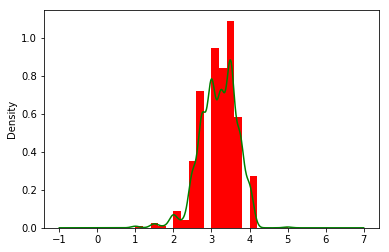

In [5]:
best_bar['rate'].plot(kind='hist',bins=20,color='r',normed=True)
best_bar['rate'].plot(kind='kde',color='g')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Шистограмму для такого типа построить не получиться.

In [6]:
try:
    best_bar['percent'].plot(kind='hist',bins=20,color='r',normed=True)
    best_bar['rate'].plot(kind='kde',color='g')
except Exception as ex:
    print(ex)
    
best_bar['percent'].dtypes

Empty 'DataFrame': no numeric data to plot


dtype('O')

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

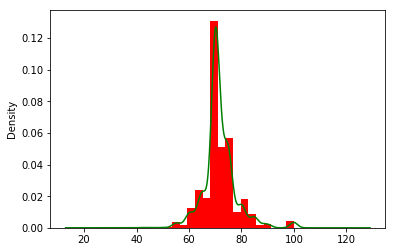

In [7]:
best_bar['percent']=best_bar['percent'].apply(lambda x: x.replace('%','')).astype(float)
best_bar['percent'].plot(kind='hist',bins=20,color='r',normed=True)
best_bar['percent'].plot(kind='kde',color='g')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

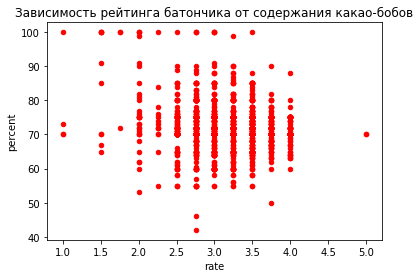

In [8]:
best_bar.plot(kind='scatter',x='rate',y='percent',color='red',title='Зависимость рейтинга батончика от содержания какао-бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

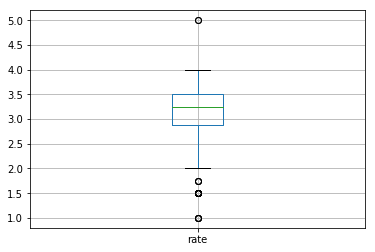

In [9]:
best_bar[['rate']].boxplot()

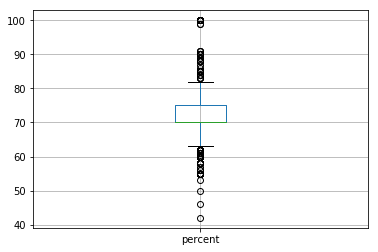

In [10]:
best_bar[['percent']].boxplot()

In [11]:
best_bar.describe()

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [12]:
bean_orig_counts=best_bar['bean_orig'].value_counts()
bean_orig_counts

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                  73
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Vietnam                           38
Costa Rica                        38
Tanzania                          34
Trinidad                          33
Ghana                             33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Congo                             10
S

In [13]:
bean_orig_counts.head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: bean_orig, dtype: int64

In [14]:
bean_orig_counts.tail()

Peru, Madagascar         1
Venezuela, Ghana         1
Suriname                 1
Dom. Rep., Madagascar    1
Cost Rica, Ven           1
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

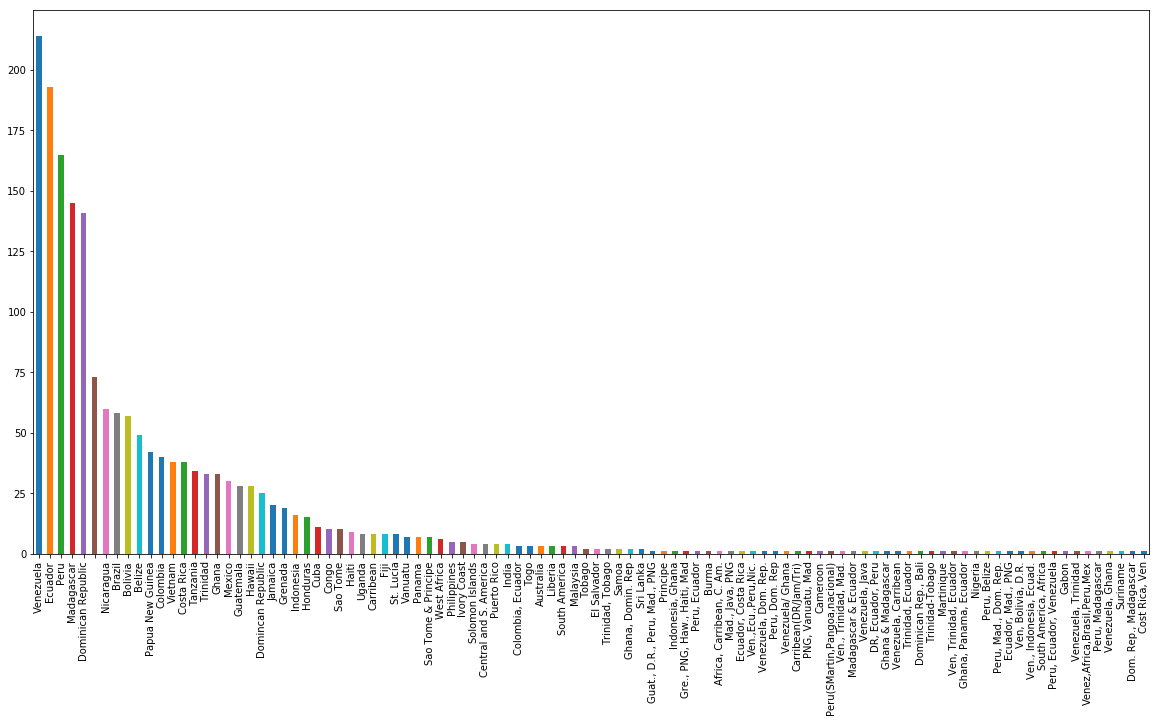

In [15]:
bean_orig_counts.plot(kind='bar',figsize=(20,10))

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [16]:
best_bar.dropna(axis=0,how='any')

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [17]:
best_bar['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [18]:
best_bar=best_bar.loc[best_bar['bean_orig']!='\xa0']
best_bar=best_bar.dropna(axis=0,how='any')

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [20]:
value_counts_dict = best_bar['bean_orig'].value_counts().to_dict()
complex_mask=[]
for el in best_bar['bean_orig']:
    complex_mask.append(value_counts_dict.get(el) <= 5)
best_bar.loc[complex_mask,'bean_orig']= 'Complex'

Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

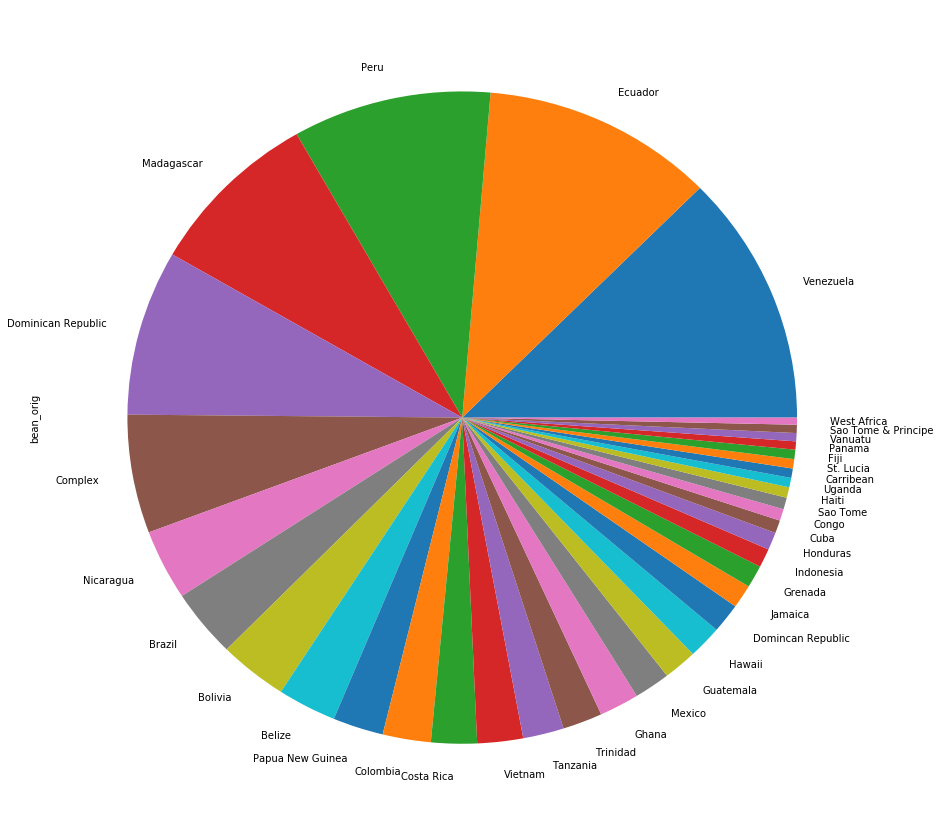

In [21]:
best_bar['bean_orig'].value_counts().plot.pie(figsize=(15, 15))

## Попарные графики распределений

In [22]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

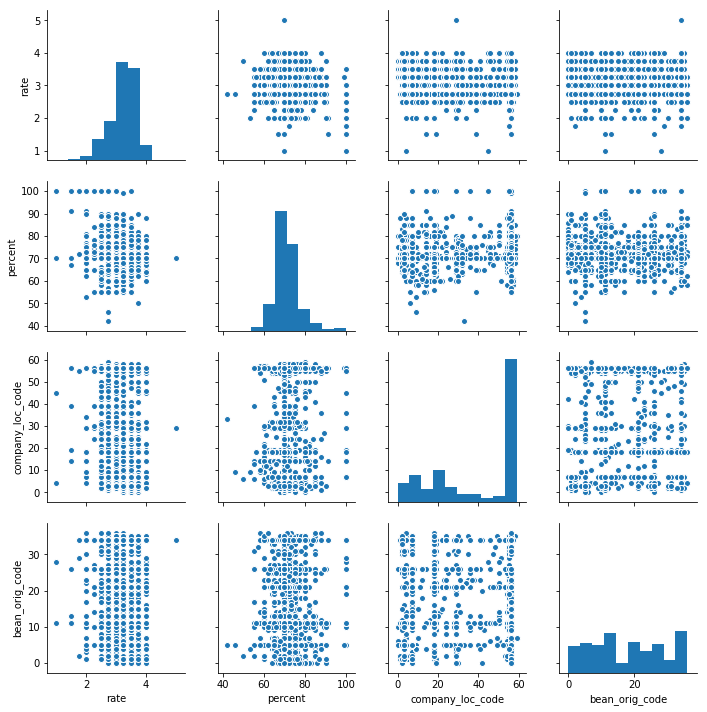

In [23]:
best_bar['company_loc_code']=best_bar['company_loc'].astype('category').cat.codes
best_bar['bean_orig_code']=best_bar['bean_orig'].astype('category').cat.codes
pairplot(best_bar)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [24]:
bean_orig_means=[]
for orig in best_bar['bean_orig'].unique():
    bean_orig_means.append([orig,best_bar['rate'].where(best_bar['bean_orig']==orig).mean()])
    
bean_orig_medians=[]
for orig in best_bar['bean_orig'].unique():
    bean_orig_medians.append([orig,best_bar['rate'].where(best_bar['bean_orig']==orig).median()])

In [25]:
pd.DataFrame(bean_orig_means).sort_values([1],ascending=False).head(3)

,0,1
28,Haiti,3.388889
25,Honduras,3.350000
29,Congo,3.325000


In [26]:
pd.DataFrame(bean_orig_medians).sort_values([1],ascending=False).head(3)

,0,1
32,Sao Tome & Principe,3.500
25,Honduras,3.500
16,Vietnam,3.375


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [27]:
company_loc_means=[]
for loc in best_bar['company_loc'].unique():
    company_loc_means.append([loc,best_bar['rate'].where(best_bar['company_loc']==loc).mean()])
    
company_loc_medians=[]
for loc in best_bar['company_loc'].unique():
    company_loc_medians.append([loc,best_bar['rate'].where(best_bar['company_loc']==loc).median()])

In [28]:
pd.DataFrame(company_loc_means).sort_values([1],ascending=False).head(3)

,0,1
53,Chile,3.75
25,Amsterdam,3.50
47,Poland,3.50


In [29]:
pd.DataFrame(company_loc_medians).sort_values([1],ascending=False).head(3)

,0,1
53,Chile,3.75
15,Belgium,3.50
11,Brazil,3.50
